# Import packages

In [128]:
from functools import reduce
import regex
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load processed data

In [129]:
df = pd.read_csv('data/trainingData/coronavirus-tweet-id-2020-01-21-22.jsonl.output.csv')

In [130]:
def parse_words(line: str) -> [str]:
    return regex.findall(r'\'(.+?)\'', line)

df.stopwords_removed = df.stopwords_removed.apply(parse_words)

# Find frequencies of non-blacklisted words

In [131]:
df = df.groupby(['sentiment'], as_index=False).agg({'stopwords_removed': sum})

In [132]:
word_blacklist = ['coronavirus', 'covid', 'first', 'case']

def filter_words(words: [str]) -> [str]:
    return [word for word in words if word not in word_blacklist]

df['words'] = df.stopwords_removed.apply(filter_words)

In [133]:
def find_frequencies(keys: [str]):
    frequencies = {}
    for key in keys:
        frequency = frequencies.get(key, 0) + 1
        frequencies[key] = frequency
    return frequencies

df['word_frequencies'] = df.words.apply(find_frequencies)

# Visualize sentiment wordclouds

negative


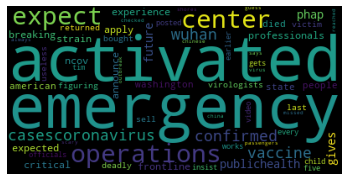

neutral


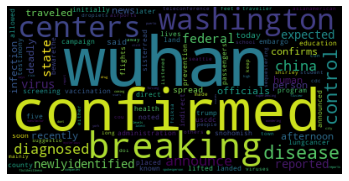

positive


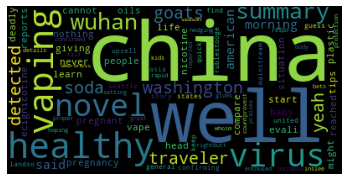

In [134]:
for _, row in df.iterrows():
    wc = WordCloud()
    wc.generate_from_frequencies(row['word_frequencies'])
    
    print(row['sentiment'])
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()